In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.9.1
Keras version: 2.9.0


In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
# CIFAR_1O yukle
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Veriyi normallestir
x_train = x_train / 255.0
x_test = x_test / 255.0

# train ve validasyon verileri böl
split = int(0.8 * x_train.shape[0])
x_val = x_train[split:]
y_val = y_train[split:]
x_train = x_train[:split]
y_train = y_train[:split]


# etiketleri one hot encodeda ccevir
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 134s 1us/step


In [9]:
model = Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5066 - accuracy: 0.4548 - val_loss: 1.1816 - val_accuracy: 0.5812
Epoch 2/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.1295 - accuracy: 0.5975 - val_loss: 0.9759 - val_accuracy: 0.6649
Epoch 3/20
1250/1250 [==============================] - 40s 32ms/step - loss: 0.9630 - accuracy: 0.6618 - val_loss: 0.9193 - val_accuracy: 0.6754
Epoch 4/20
1250/1250 [==============================] - 39s 31ms/step - loss: 0.8595 - accuracy: 0.6992 - val_loss: 0.8436 - val_accuracy: 0.7060
Epoch 5/20
1250/1250 [==============================] - 41s 33ms/step - loss: 0.7871 - accuracy: 0.7251 - val_loss: 0.7882 - val_accuracy: 0.7283
Epoch 6/20
1250/1250 [==============================] - 40s 32ms/step - loss: 0.7277 - accuracy: 0.7437 - val_loss: 0.7866 - val_accuracy: 0.7280
Epoch 7/20
1250/1250 [==============================] - 39s 31ms/step - loss: 0.6757 - accuracy: 0.7629 - val_loss: 0.7643 -

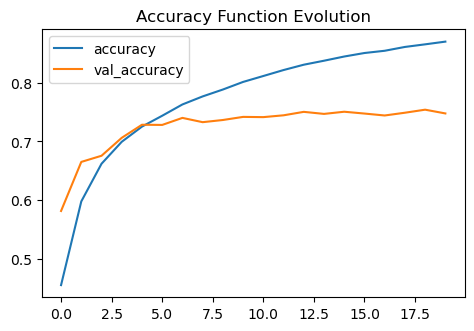

In [12]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_new = np.argmax(y_test, axis=1)


313/313 [==============================] - 3s 8ms/step


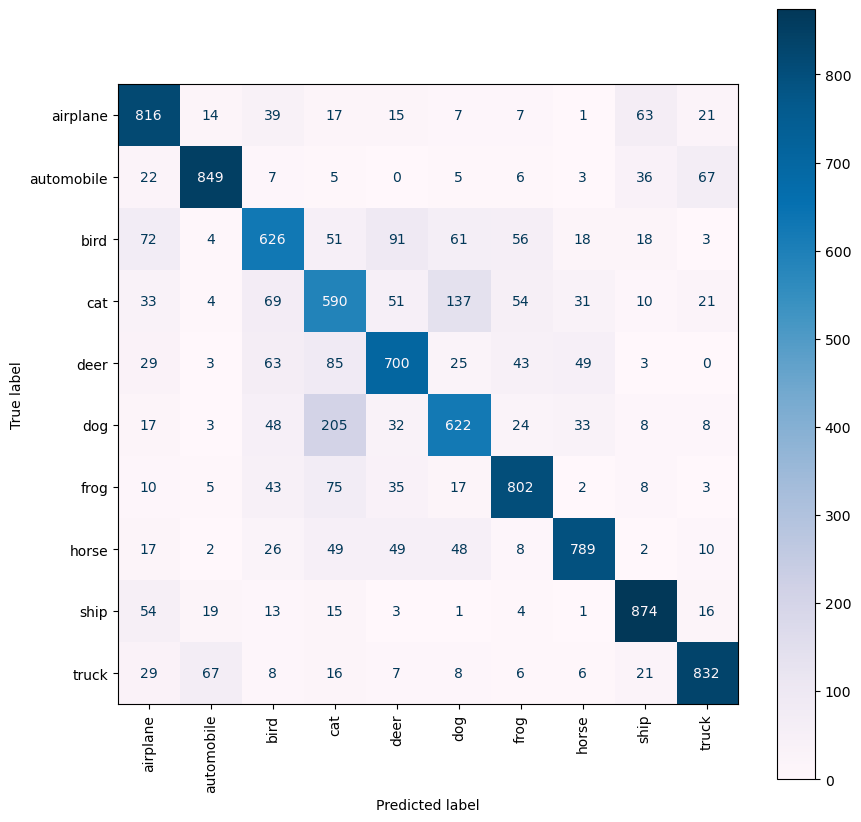

In [17]:
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='PuBu')

plt.show()

In [22]:
predictions = model.predict(x_test)
n_test = len(x_test)


313/313 [==============================] - 3s 8ms/step


In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777",  label = labels)
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

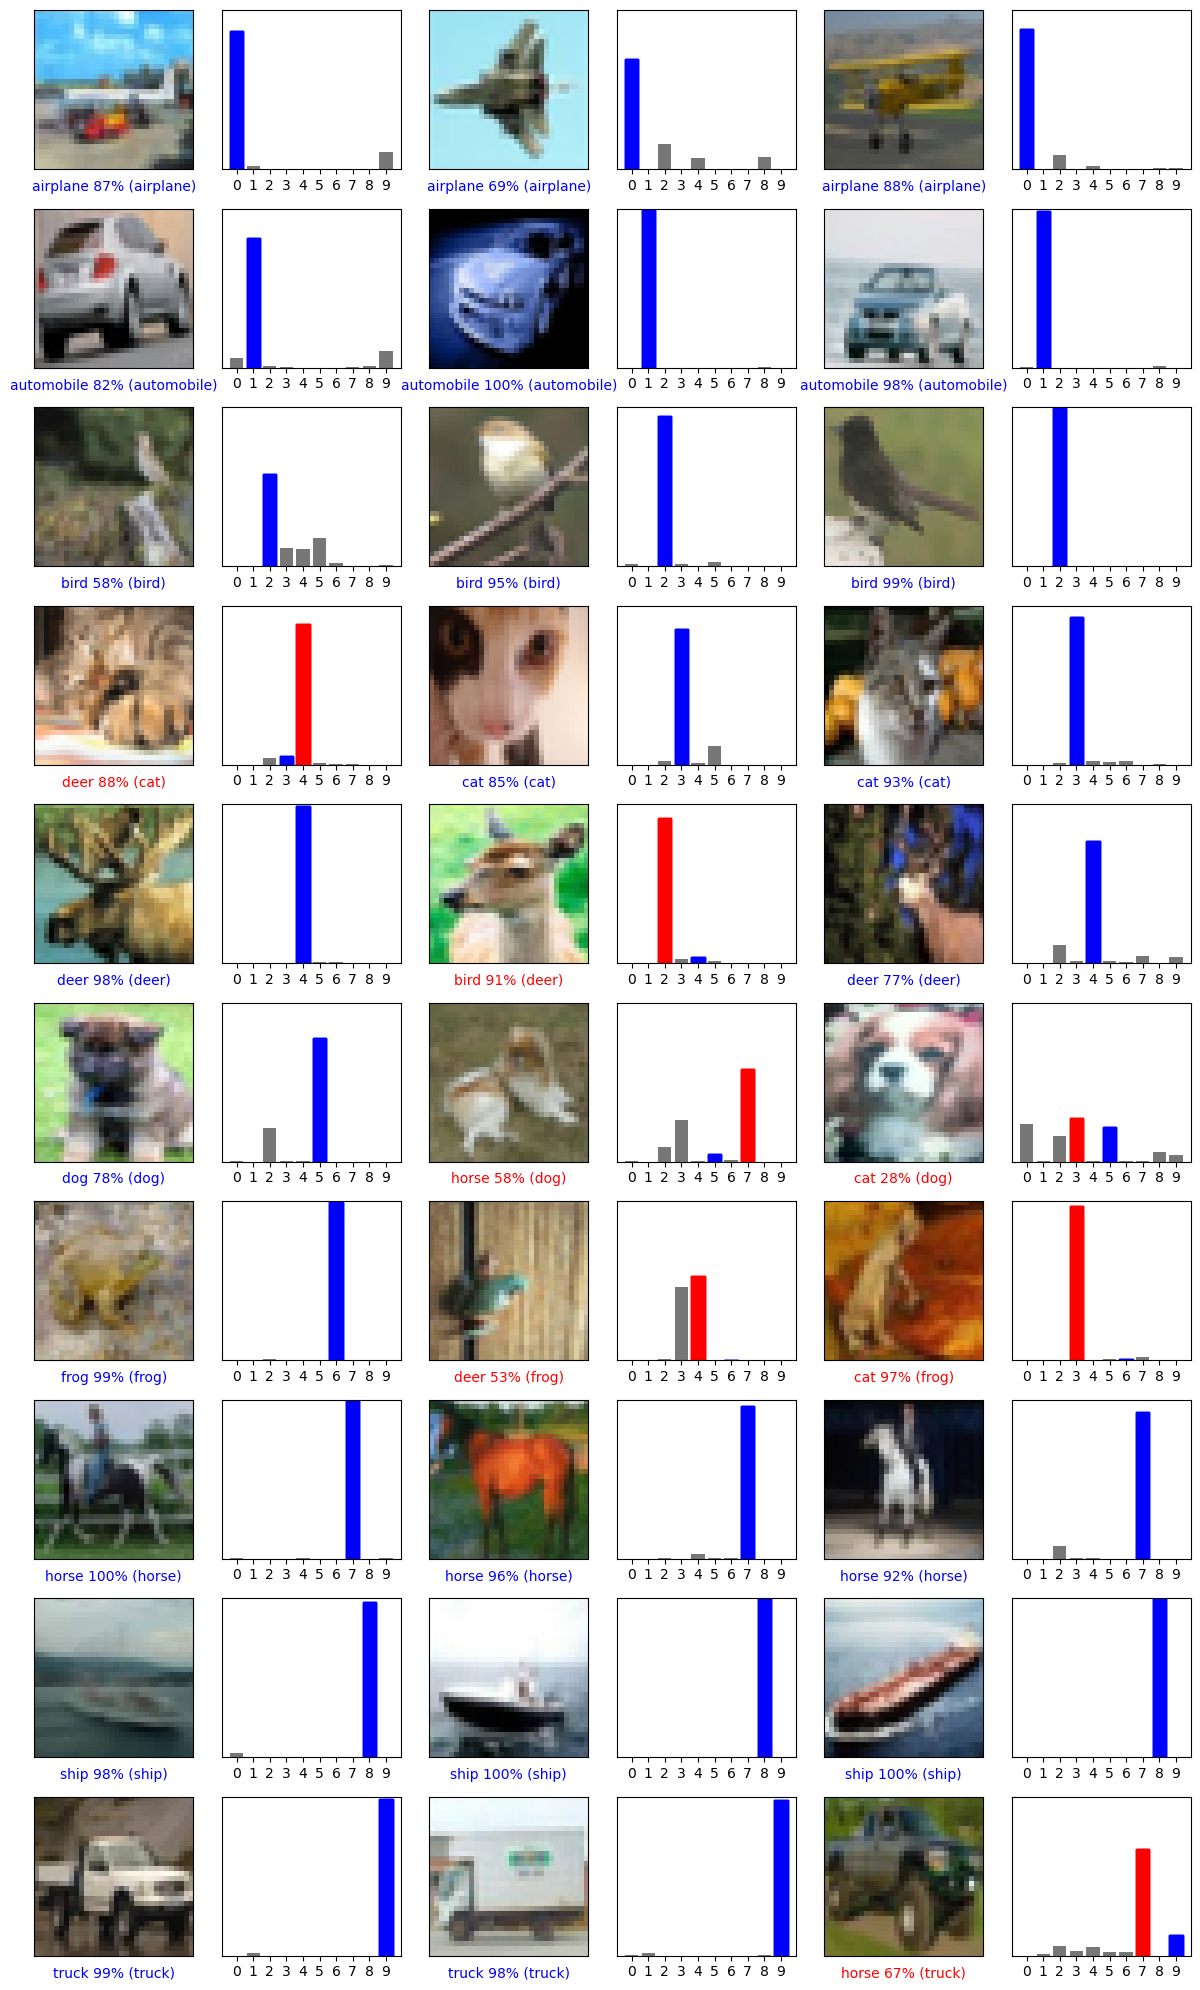

In [24]:
# Her sınıf için 3 tane random resim seçip, bu resim için yapılan doğru tahminleri mavi, yanlış tahminleri kırmızı
# Yapılan diğer tahminleri ise gri olarak göster
num_rows = 10
num_cols = 3
j = 0
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  j = 0 
  flag = 0
  while j<3:
    while flag == 0:
      index = np.random.randint(0, n_test)
      if y_test_new[index] == i//3:
        flag = 1
    j += 1
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(index, predictions[index], y_test_new, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(index, predictions[index], y_test_new)
plt.tight_layout()
plt.show()